In [3]:
import requests, pandas as pd,numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers  import Dense, Dropout,LSTM
from tensorflow.keras.models import Sequential

In [4]:
api_key ='3a26916aa35b483d9d4e8abf719b08af'
symbol= 'BTC/USD'
interval='2min'
order='asc'
start_date= '2022-08-05 00:00:00'
end_date= '2022-09-01 00:00:00'

api_url="https://api.twelvedata.com/time_series?apikey=3a26916aa35b483d9d4e8abf719b08af&interval=5min&symbol=BTC/USD&start_date=2022-01-01 15:24:00&end_date=2022-08-31 15:24:00"


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
data=requests.get(api_url).json()
data_final=pd.DataFrame(data['values'])
data_final


,datetime,open,high,low,close
0,2022-08-31 15:20:00,20044.03906,20059.72070,19998.65039,20015.39062
1,2022-08-31 15:15:00,19967.52930,20008.08008,19951.57031,19988.15039
2,2022-08-31 15:10:00,19952.66992,19977.91992,19910.05078,19948.80078
3,2022-08-31 15:05:00,19975.40039,19995.00000,19892.49023,19932.48047
4,2022-08-31 15:00:00,20113.26953,20113.26953,19990.08008,19990.08008
...,...,...,...,...,...
4995,2022-08-14 07:05:00,24791.80078,24800.03906,24735.71094,24735.71094
4996,2022-08-14 07:00:00,24676.36914,24800.03906,24671.59961,24800.03906
4997,2022-08-14 06:55:00,24644.91992,24678.60938,24644.91992,24671.59961
4998,2022-08-14 06:50:00,24635.33008,24660.91016,24635.33008,24652.24023


In [7]:
data.keys()

dict_keys(['meta', 'values', 'status'])

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [9]:
data_final['close'].values.reshape(-1,1).shape

(5000, 1)

In [10]:
scaled_data

array([[0.08506354],
       [0.08017133],
       [0.07310433],
       ...,
       [0.92129595],
       [0.9178191 ],
       [0.91517709]])

In [11]:
time_interval_train=24
prediction_interval=12
x_train=[]
y_train=[]

In [12]:
for i in range(time_interval_train,len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i-time_interval_train:i,0])
  y_train.append(scaled_data[i+prediction_interval,0])
x_train= np.array(x_train)
y_train= np.array(y_train)
x_train.shape

(4964, 24)

In [13]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(4964, 24, 1)

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences= True, activation="relu"))
model.add(Dropout(0.3))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))

In [15]:
model.compile(loss ='mean_squared_error', optimizer= "adam", metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train, epochs=10,batch_size=52)

Epoch 1/10
96/96 [==============================] - 9s 96ms/step - loss: 0.0017 - accuracy: 4.0290e-04
Epoch 2/10
96/96 [==============================] - 10s 109ms/step - loss: 0.0016 - accuracy: 4.0290e-04
Epoch 3/10
96/96 [==============================] - 11s 115ms/step - loss: 0.0016 - accuracy: 4.0290e-04
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0015 - accuracy: 4.0290e-04
Epoch 5/10
96/96 [==============================] - 12s 120ms/step - loss: 0.0015 - accuracy: 4.0290e-04
Epoch 6/10
96/96 [==============================] - 11s 120ms/step - loss: 0.0015 - accuracy: 4.0290e-04
Epoch 7/10
96/96 [==============================] - 15s 159ms/step - loss: 0.0015 - accuracy: 4.0290e-04
Epoch 8/10
96/96 [==============================] - 12s 128ms/step - loss: 0.0016 - accuracy: 4.0290e-04
Epoch 9/10
96/96 [==============================] - 11s 112ms/step - loss: 0.0015 - accuracy: 4.0290e-04
Epoch 10/10
96/96 [==============================] - 11s 

In [ ]:
model.save("prediction.h5")

In [ ]:
from tensorflow.keras.models import load_model
load=load_model('prediction.h5')

In [18]:
test_start='2022-09-10 00:00:00'
test_end='2022-09-11 00:00:00'
interval= '5min'
test_api_url=f"https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&symbol=BTC/USD&start_date={test_start}&end_date={test_end}"
test_data= requests.get(test_api_url).json()
test_data_final=pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2022-09-10 16:50:00,21332.34961,21386.64062,21326.10938,21386.64062
1,2022-09-10 16:45:00,21324.61914,21346.55078,21313.98047,21332.85938
2,2022-09-10 16:40:00,21240.16992,21329.72070,21233.51953,21329.72070
3,2022-09-10 16:35:00,21220.75000,21247.61914,21220.75000,21237.53906
4,2022-09-10 16:30:00,21195.74023,21240.30078,21195.74023,21221.91992
...,...,...,...,...,...
198,2022-09-10 00:20:00,21305.22070,21347.08008,21302.00000,21302.00000
199,2022-09-10 00:15:00,21270.30078,21325.26953,21267.76953,21315.43945
200,2022-09-10 00:10:00,21299.48047,21309.25977,21269.75000,21271.55078
201,2022-09-10 00:05:00,21337.97070,21342.14062,21297.13086,21297.13086


In [19]:
bitcoin_prices=pd.to_numeric(test_data_final['close'], errors ='coerce').values
test_inputs= test_data_final['close'].values
test_inputs= test_inputs.reshape(-1,1)
model_inputs= scaler.fit_transform(test_inputs)

In [ ]:
model_inputs.shape


(2095, 1)

In [ ]:
model_inputs.shape

(2095, 1)

In [20]:
x_test=[]
for x in range(time_interval_train, len(model_inputs)):
  x_test.append(model_inputs[x - time_interval_train:x,0])


x_test= np.array(x_test)
print(x_test.shape)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1]))
print(x_test)

(179, 24)
[[0.45446407 0.33820289 0.33141787 ... 0.16323264 0.13975748 0.16094002]
 [0.33820289 0.33141787 0.13214493 ... 0.13975748 0.16094002 0.18400564]
 [0.33141787 0.13214493 0.09838037 ... 0.16094002 0.18400564 0.1966763 ]
 ...
 [0.17966104 0.202144   0.22782736 ... 0.16457106 0.27149286 0.30054549]
 [0.202144   0.22782736 0.25618755 ... 0.27149286 0.30054549 0.2056695 ]
 [0.22782736 0.25618755 0.21500468 ... 0.30054549 0.2056695  0.26096704]]


In [ ]:
x_test.shape

(2071, 24)

In [21]:
prediction_prices=model.predict(x_test)
#predication_prices= scaler.inverse_transform(prediction_prices)


6/6 [==============================] - 2s 22ms/step


In [22]:
prediction_prices
prediction_prices = np.reshape(prediction_prices,(prediction_prices.shape[0],1))

In [23]:

prediction_prices

array([[0.13357806],
       [0.1264712 ],
       [0.12531114],
       [0.12570986],
       [0.13044713],
       [0.13567118],
       [0.14182569],
       [0.148522  ],
       [0.15389131],
       [0.15925895],
       [0.16316482],
       [0.16570121],
       [0.16594158],
       [0.16420692],
       [0.16172588],
       [0.15592586],
       [0.14979358],
       [0.13894168],
       [0.13070776],
       [0.12314025],
       [0.12226827],
       [0.11863501],
       [0.11806745],
       [0.12064565],
       [0.12423041],
       [0.12922329],
       [0.13641001],
       [0.14567661],
       [0.15556672],
       [0.16642348],
       [0.17749645],
       [0.18881626],
       [0.19934574],
       [0.21076342],
       [0.22060923],
       [0.23183487],
       [0.24393897],
       [0.2551131 ],
       [0.26284534],
       [0.27011767],
       [0.27386168],
       [0.27623498],
       [0.27864304],
       [0.28297693],
       [0.28714088],
       [0.29172963],
       [0.2966753 ],
       [0.301

In [24]:
prediction_prices= scaler.inverse_transform(prediction_prices)

In [ ]:
prediction_prices

array([[20536.969],
       [20525.39 ],
       [20512.014],
       ...,
       [20099.117],
       [20102.105],
       [20103.459]], dtype=float32)

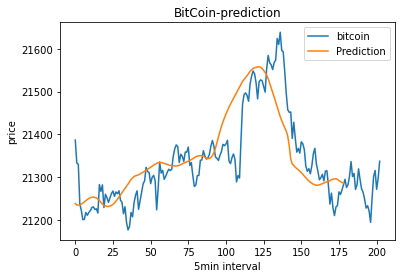

In [25]:
plt.plot(bitcoin_prices, label="bitcoin")
plt.plot(prediction_prices, label='Prediction')
plt.title('BitCoin-prediction')
plt.xlabel("5min interval")
plt.ylabel("price")
plt.legend()
plt.show()


In [ ]:
last_data= model_inputs[len(model_inputs)+1 - time_interval_train:len(model_inputs)+1,0]
last_data= np.array(last_data)



In [ ]:
last_data=np.reshape(last_data,(1,last_data.shape[0], 1))
last_data.shape

(1, 23, 1)

In [ ]:
x=model.predict(last_data)


1/1 [==============================] - 1s 621ms/step


In [ ]:
print(x)

[[0.7052948]]


In [ ]:
x=scaler.inverse_transform(x)

In [ ]:
x

array([[20083.082]], dtype=float32)

In [ ]:
print('The next hours prediction value is =',x[0][0])

The next hours prediction value is = 20083.082
